<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_4/dstep23_delaware_natural_areas_rvichot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Open Data Delaware: Delaware Natural Areas**

*September 19, 2023*

This notebook will visualize the location of the Delaware Natural Areas from Open Data Delaware, making significant use of string manipulations to extract geographic information.  The data can be found [here](https://data.delaware.gov/dataset/Natural-Areas/aryx-uafh).

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First we load the data (getting the csv link from the "export" tab on the data page).

In [2]:
# -- set the file name
fname = "https://data.delaware.gov/api/views/aryx-uafh/rows.csv?accessType=DOWNLOAD"

# -- load the data
natarea = pd.read_csv(fname)

We should always look at the data first,

In [6]:
print(natarea)

                                             the_geom  OBJECTID  \
0   MULTIPOLYGON (((-75.64912602896 39.80740064493...       118   
1   MULTIPOLYGON (((-75.161334462424 38.5783090355...        74   
2   MULTIPOLYGON (((-75.071331424065 38.6709819080...       120   
3   MULTIPOLYGON (((-75.062949072571 38.6036231026...       100   
4   MULTIPOLYGON (((-75.662398012055 39.0188612282...        86   
5   MULTIPOLYGON (((-75.08738635108 38.78504228698...        82   
6   MULTIPOLYGON (((-75.198760828376 38.5499160043...       130   
7   MULTIPOLYGON (((-75.608486069437 39.8346566679...        93   
8   MULTIPOLYGON (((-75.766084143907 39.7379912124...       133   
9   MULTIPOLYGON (((-75.703748211982 38.8242627212...       107   
10  MULTIPOLYGON (((-75.770987007692 39.6545802056...        85   
11  MULTIPOLYGON (((-75.586002288904 39.4482882861...        69   
12  MULTIPOLYGON (((-75.785112429833 39.6221611598...        92   
13  MULTIPOLYGON (((-75.170492522641 38.7957091385...        7

Let's change the maximum nuber of displayed columns to see the full DataFrame

In [11]:
# -- set maximum number of rows to be printed to be 500
pd.set_option("display.max_rows", 10)

In [12]:
print(natarea)

                                             the_geom  OBJECTID  \
0   MULTIPOLYGON (((-75.64912602896 39.80740064493...       118   
1   MULTIPOLYGON (((-75.161334462424 38.5783090355...        74   
2   MULTIPOLYGON (((-75.071331424065 38.6709819080...       120   
3   MULTIPOLYGON (((-75.062949072571 38.6036231026...       100   
4   MULTIPOLYGON (((-75.662398012055 39.0188612282...        86   
..                                                ...       ...   
63  MULTIPOLYGON (((-75.44967167158 39.10201975528...       124   
64  MULTIPOLYGON (((-75.336131321998 38.5231268198...        95   
65  MULTIPOLYGON (((-75.567849141727 39.4167884754...        73   
66  MULTIPOLYGON (((-75.696586220903 39.5471710416...        81   
67  MULTIPOLYGON (((-75.544694544256 38.6777433638...       127   

                                          Name         ACRES    SHAPE.AREA  \
0           Red Clay Creek Valley Natural Area   1418.126035  9.732665e+06   
1                Blackwater Creek Natur

And let's look at the data types

In [14]:
natarea

,the_geom,OBJECTID,Name,ACRES,SHAPE.AREA,SHAPE.LEN
0,MULTIPOLYGON (((-75.64912602896 39.80740064493...,118,Red Clay Creek Valley Natural Area,1418.126035,9.732665e+06,112029.956159
1,MULTIPOLYGON (((-75.161334462424 38.5783090355...,74,Blackwater Creek Natural Area,322.108104,2.135598e+06,24775.736950
2,MULTIPOLYGON (((-75.071331424065 38.6709819080...,120,Rehoboth Bay Natural Area,1909.172513,1.268514e+07,135745.381206
3,MULTIPOLYGON (((-75.062949072571 38.6036231026...,100,Indian River Bay Natural Area,958.319821,6.355614e+06,61981.066781
4,MULTIPOLYGON (((-75.662398012055 39.0188612282...,86,Choptank Forests Natural Area,5992.271477,4.028066e+07,236286.445365
...,...,...,...,...,...,...
63,MULTIPOLYGON (((-75.44967167158 39.10201975528...,124,St. Jones River Natural Area,4673.542892,3.143686e+07,223390.030801
64,MULTIPOLYGON (((-75.336131321998 38.5231268198...,95,Great Cypress Swamp Natural Area,12243.976855,8.099554e+07,100303.179294
65,MULTIPOLYGON (((-75.567849141727 39.4167884754...,73,Blackbird Natural Area,12874.114322,8.726947e+07,525269.700137
66,MULTIPOLYGON (((-75.696586220903 39.5471710416...,81,Canal Marine Geologic Formations-Low Bluff,2.661637,1.813830e+04,1012.536743


In order to visualize the location of these areas, we'll have to deal with the `"the_geom"` column.  But notice this complication:

In [16]:
# -- print the value and type of the 0th entry of "the_geom"
type(natarea["the_geom"].iloc[0])

str

## **A Brief Aside on <i>"string manipulations"</i>**

In [23]:
# -- create a string
mystr = "Hello, how are you?"

In [19]:
print(mystr)

Hello, how are you?


In [24]:
# -- print elements of string
mystr[0]

'H'

In [25]:
mystr[4:10]

'o, how'

In [32]:
# -- "split" the string
spl = mystr.split(",")

print(spl)

['Hello', ' how are you?']


notice the space is still there in front of the word "how"

In [33]:
# -- include the space in the split
spl = mystr.split(", ")

print(spl)

['Hello', 'how are you?']


Remove the question mark

In [35]:
# -- split the string and then replace the question mark
spl = mystr.split(", ")
hay = spl[1].replace("?", "")

print(hay)

how are you


another useful function modifies capitalization

In [36]:
# -- print modified capitalization
mystr.lower()

'hello, how are you?'

In [37]:
mystr.upper()

'HELLO, HOW ARE YOU?'

**What if I wanted to remove spaces?**

In [38]:
# -- remove spaces
hay.replace(" ", "")

'howareyou'

**What if I wanted to split `spl[1]` into its three words?**

In [43]:
# -- split into words
hay.split(" ")

['how', 'are', 'you']

Finally, a particularly useful method is the "join" method

In [44]:
# -- join strings with a common separator
sep = ","
words = ["Greg", "Dobler", "Biden School"]
csv = sep.join(words)

print("here is the list: {0}".format(words))
print("here is the list of words joined with a comma: {0}".format(csv))

here is the list: ['Greg', 'Dobler', 'Biden School']
here is the list of words joined with a comma: Greg,Dobler,Biden School


---

## **Working with strings in DataFrames**

As we saw above, the `"the_geom"` column in the DataFrame is a string.  It is a string containing the the latitude and longitude values of the Natural Area.  It would be nice to put the locations of these on a map.  To do that, we need a separate column for latitude and longitude.  I.e., we'd like to first pull out the first latitude and longitude for each string and put it in its own column.

We can do that with string manipulations that act on a whole column:

In [45]:
natarea["the_geom"]

0     MULTIPOLYGON (((-75.64912602896 39.80740064493...
1     MULTIPOLYGON (((-75.161334462424 38.5783090355...
2     MULTIPOLYGON (((-75.071331424065 38.6709819080...
3     MULTIPOLYGON (((-75.062949072571 38.6036231026...
4     MULTIPOLYGON (((-75.662398012055 39.0188612282...
                            ...                        
63    MULTIPOLYGON (((-75.44967167158 39.10201975528...
64    MULTIPOLYGON (((-75.336131321998 38.5231268198...
65    MULTIPOLYGON (((-75.567849141727 39.4167884754...
66    MULTIPOLYGON (((-75.696586220903 39.5471710416...
67    MULTIPOLYGON (((-75.544694544256 38.6777433638...
Name: the_geom, Length: 68, dtype: object

In [48]:
# -- remove the "(" characters
cmod = natarea["the_geom"].str.replace("(", "")

<ipython-input-48-b00683be1e59>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cmod = natarea["the_geom"].str.replace("(", "")


In [51]:
# -- remove the word "MULTIPOLYGON "
cmod2 = cmod.str.replace("MULTIPOLYGON ", "")
cmod2

0     -75.64912602896 39.807400644939, -75.647812777...
1     -75.161334462424 38.578309035524, -75.16130645...
2     -75.071331424065 38.670981908029, -75.07111375...
3     -75.062949072571 38.60362310262, -75.062973968...
4     -75.662398012055 39.018861228212, -75.66142378...
                            ...                        
63    -75.44967167158 39.102019755288, -75.449528119...
64    -75.336131321998 38.523126819843, -75.33608008...
65    -75.567849141727 39.416788475447, -75.56783101...
66    -75.696586220903 39.547171041615, -75.69608292...
67    -75.544694544256 38.677743363894, -75.54526951...
Name: the_geom, Length: 68, dtype: object

In [57]:
# -- split the string to access the first lon/lat pair
cmod3 = cmod2.str.split(",").str[0]
cmod3

0      -75.64912602896 39.807400644939
1     -75.161334462424 38.578309035524
2     -75.071331424065 38.670981908029
3      -75.062949072571 38.60362310262
4     -75.662398012055 39.018861228212
                    ...               
63     -75.44967167158 39.102019755288
64    -75.336131321998 38.523126819843
65    -75.567849141727 39.416788475447
66    -75.696586220903 39.547171041615
67    -75.544694544256 38.677743363894
Name: the_geom, Length: 68, dtype: object

In [60]:
# -- split that pair into lon and lat
cmod4 = cmod3.str.split(" ", expand=True)
cmod4

,0,1
0,-75.64912602896,39.807400644939
1,-75.161334462424,38.578309035524
2,-75.071331424065,38.670981908029
3,-75.062949072571,38.60362310262
4,-75.662398012055,39.018861228212
...,...,...
63,-75.44967167158,39.102019755288
64,-75.336131321998,38.523126819843
65,-75.567849141727,39.416788475447
66,-75.696586220903,39.547171041615


Let's add these locations back to the natural areas DataFrame:

In [62]:
# -- add lon/lat columns to original DataFrame
natarea["lon"] = cmod4[0].astype(float)
natarea["lat"] = cmod4[1].astype(float)

And so now we can make the scatter plot

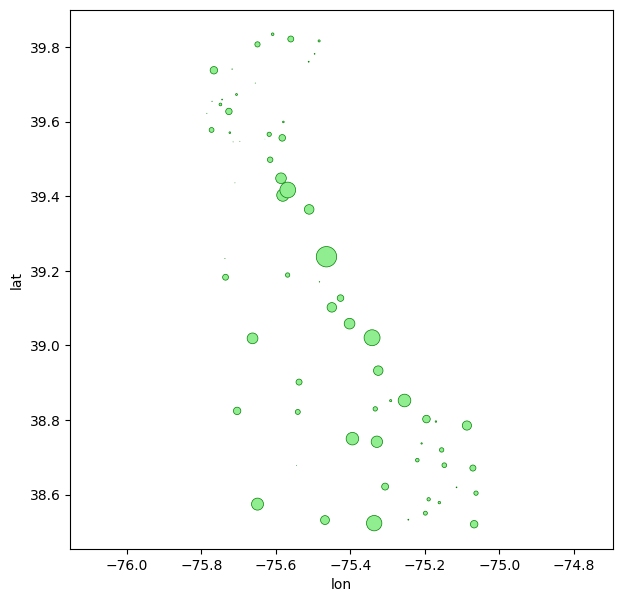

In [69]:
# -- make a scatter plot
fig, ax = plt.subplots(figsize=(7, 7))

natarea.plot.scatter("lon", "lat", fc="lightgreen", ec="green", lw=0.5, s=natarea["ACRES"] / 100., ax=ax)

ax.axis("equal") # set the aspect ratio of the axes to be equal
fig.show()

---

### **Quick Demo of `Folium`**

In [70]:
import folium

In [71]:
# -- create a map
mymap = folium.Map(location=[39.2, -75.5], zoom_start=8, width=500)

# -- add each Natural area to the map, one by one
ndata = len(natarea)
for ii in range(ndata):

  lat  = natarea["lat"].iloc[ii]
  lon  = natarea["lon"].iloc[ii]
  rad  = natarea["ACRES"].iloc[ii] / 5.
  name = natarea["Name"].iloc[ii]

  circ = folium.Circle(location=[lat, lon], radius=rad, popup=name, fill=True, color="red")
  circ.add_to(mymap)

mymap